<a href="https://colab.research.google.com/github/Guhenriquetorres/Analise_Dados_Enem_2021/blob/main/BigQuery_Dados_ONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'main-reducer-376123' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=main-reducer-376123:US:bquxjob_4b195fa1_18edceec51f)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7e3ab807_18ee8a23ab6') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `basedosdados.br_ons_avaliacao_operacao.energia_armazenada_reservatorio` LIMIT 200000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7e3ab807_18ee8a23ab6') # Job ID inserted based on the query results selected to explore
df = job.to_dataframe()
df

,data,ano,mes,reservatorio,tipo_reservatorio,id_reservatorio_planejamento,reservatorio_equivalente_energia,id_subsistema,subsistema,id_subsistema_jusante,...,energia_maxima_armazenada_total,proporcao_energia_armazenada,proporcao_contribuicao_energia_armazenada_bacia,proporcao_contribuicao_energia_maxima_armazenada_bacia,proporcao_contribuicao_energia_armazenada_subsistema,proporcao_contribuicao_energia_maxima_armazenada_subsistema,proporcao_contribuicao_energia_armazenada_subsistema_jusante,proporcao_contribuicao_energia_maxima_armazenada_subsistema_jusante,proporcao_contribuicao_energia_armazenada_sin,proporcao_contribuicao_energia_armazenada_maxima_sin
0,2024-01-06,2024,1,SAO ROQUE,Reservatorio com Usina,88,SUL,S,SUL,nan,...,801.911987,98.025002,0.135421,0.11915,0.044678,0.039196,0.0,0.0,0.004493,0.002746
1,2024-01-30,2024,1,SAO ROQUE,Reservatorio com Usina,88,SUL,S,SUL,nan,...,801.911987,104.232803,0.132415,0.11915,0.049543,0.039196,0.0,0.0,0.004684,0.002746
2,2024-01-10,2024,1,SAO ROQUE,Reservatorio com Usina,88,SUL,S,SUL,nan,...,801.911987,94.924301,0.136524,0.11915,0.045270,0.039196,0.0,0.0,0.004378,0.002746
3,2024-01-07,2024,1,SAO ROQUE,Reservatorio com Usina,88,SUL,S,SUL,nan,...,801.911987,97.033699,0.135123,0.11915,0.044629,0.039196,0.0,0.0,0.004445,0.002746
4,2024-01-08,2024,1,SAO ROQUE,Reservatorio com Usina,88,SUL,S,SUL,nan,...,801.911987,95.917297,0.135452,0.11915,0.044730,0.039196,0.0,0.0,0.004409,0.002746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2010-05-30,2010,5,CACU,Reservatorio com Usina,311,None,SE,SUDESTE,SE,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
199996,2010-05-27,2010,5,CACU,Reservatorio com Usina,311,None,SE,SUDESTE,SE,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
199997,2010-05-05,2010,5,CACU,Reservatorio com Usina,311,None,SE,SUDESTE,SE,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
199998,2010-05-02,2010,5,CACU,Reservatorio com Usina,311,None,SE,SUDESTE,SE,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
len(df)

200000

In [ ]:
df.isnull().sum()

data                                                                        0
ano                                                                         0
mes                                                                         0
reservatorio                                                                0
tipo_reservatorio                                                           0
id_reservatorio_planejamento                                                0
reservatorio_equivalente_energia                                       142622
id_subsistema                                                               0
subsistema                                                                  0
id_subsistema_jusante                                                       0
subsistema_jusante                                                          0
bacia                                                                       0
energia_armazenada_subsistema                                   

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
# Selecionando apenas as colunas desejadas
df = df.loc[:, ['data', 'ano', 'mes', 'reservatorio', 'tipo_reservatorio',
                       'id_reservatorio_planejamento', 'reservatorio_equivalente_energia',
                       'id_subsistema', 'subsistema', 'id_subsistema_jusante',
                       'subsistema_jusante', 'bacia', 'energia_armazenada_subsistema',
                       'energia_armazenada_jusante_subsistema', 'energia_armazenada_total','proporcao_contribuicao_energia_armazenada_sin','proporcao_contribuicao_energia_armazenada_bacia']]

In [ ]:
df.isnull().sum()

data                                                    0
ano                                                     0
mes                                                     0
reservatorio                                            0
tipo_reservatorio                                       0
id_reservatorio_planejamento                            0
reservatorio_equivalente_energia                   142622
id_subsistema                                           0
subsistema                                              0
id_subsistema_jusante                                   0
subsistema_jusante                                      0
bacia                                                   0
energia_armazenada_subsistema                       20675
energia_armazenada_jusante_subsistema               50646
energia_armazenada_total                                0
proporcao_contribuicao_energia_armazenada_sin           0
proporcao_contribuicao_energia_armazenada_bacia         0
dtype: int64

In [ ]:
print(df.dtypes)


data                                                dbdate
ano                                                  Int64
mes                                                  Int64
reservatorio                                        object
tipo_reservatorio                                   object
id_reservatorio_planejamento                        object
reservatorio_equivalente_energia                    object
id_subsistema                                       object
subsistema                                          object
id_subsistema_jusante                               object
subsistema_jusante                                  object
bacia                                               object
energia_armazenada_subsistema                      float64
energia_armazenada_jusante_subsistema              float64
energia_armazenada_total                           float64
proporcao_contribuicao_energia_armazenada_sin      float64
proporcao_contribuicao_energia_armazenada_bacia    float

In [ ]:
df.describe()

,ano,mes,energia_armazenada_subsistema,energia_armazenada_jusante_subsistema,energia_armazenada_total,proporcao_contribuicao_energia_armazenada_sin,proporcao_contribuicao_energia_armazenada_bacia
count,200000.0,200000.0,179325.000000,149354.000000,200000.000000,200000.000000,200000.000000
mean,2012.0541,6.21797,2340.338805,286.654291,2312.471106,0.013915,0.243208
std,6.459965,3.492511,4949.965852,1620.026929,5085.244881,0.028651,0.324920
min,2004.0,1.0,-11.385000,-14.467000,-18.036000,-0.000251,-0.035304
25%,2005.0,3.0,79.000000,0.000000,11.000000,0.000078,0.002055
50%,2012.0,6.0,491.290985,0.000000,380.799500,0.002514,0.074236
75%,2019.0,9.0,2118.000000,0.000000,2003.860500,0.013040,0.351645
max,2024.0,12.0,34652.000000,15213.000000,34652.000000,0.223628,1.000002


In [ ]:
columns_to_adjust = ['energia_armazenada_subsistema', 'energia_armazenada_jusante_subsistema', 'energia_armazenada_total']
df[columns_to_adjust] = df[columns_to_adjust].where(df[columns_to_adjust] >= 0, 0)

In [ ]:
df[df['energia_armazenada_jusante_subsistema'] < 0]['energia_armazenada_jusante_subsistema']

Series([], Name: energia_armazenada_jusante_subsistema, dtype: float64)

ESPLORANDO AS VARIÁVEIS NUMÉRICAS

In [ ]:
# Selecionando apenas as colunas relevantes
subset_df = df[['energia_armazenada_subsistema', 'energia_armazenada_jusante_subsistema',
                'energia_armazenada_total']]

# Medidas de Tendência Central
media = subset_df.mean()
mediana = subset_df.median()
moda = subset_df.mode().iloc[0]  # Podemos ter mais de uma moda, então estamos pegando apenas a primeira

# Dispersão
variancia = subset_df.var()
desvio_padrao = subset_df.std()
amplitude = subset_df.max() - subset_df.min()
iqr = subset_df.quantile(0.75) - subset_df.quantile(0.25)

# Assimetria e Curtose
assimetria = subset_df.skew()
curtose = subset_df.kurtosis()

# Exibindo os resultados
print("Medidas de Tendência Central:")
print(media)
print("\nMediana:")
print(mediana)
print("\nModa:")
print(moda)
print("\nDispersão:")
print("Variância:")
print(variancia)
print("\nDesvio Padrão:")
print(desvio_padrao)
print("\nAmplitude:")
print(amplitude)
print("\nIntervalo Interquartil (IQR):")
print(iqr)
print("\nAssimetria:")
print(assimetria)
print("\nCurtose:")
print(curtose)


Medidas de Tendência Central:
energia_armazenada_subsistema            2098.407150
energia_armazenada_jusante_subsistema     214.066105
energia_armazenada_total                 2312.473255
dtype: float64

Mediana:
energia_armazenada_subsistema            349.0000
energia_armazenada_jusante_subsistema      0.0000
energia_armazenada_total                 380.7995
dtype: float64

Moda:
energia_armazenada_subsistema            0.0
energia_armazenada_jusante_subsistema    0.0
energia_armazenada_total                 0.0
Name: 0, dtype: float64

Dispersão:
Variância:
energia_armazenada_subsistema            2.247691e+07
energia_armazenada_jusante_subsistema    1.975423e+06
energia_armazenada_total                 2.585971e+07
dtype: float64

Desvio Padrão:
energia_armazenada_subsistema            4740.981955
energia_armazenada_jusante_subsistema    1405.497561
energia_armazenada_total                 5085.243902
dtype: float64

Amplitude:
energia_armazenada_subsistema            34652.0
ener

# **DATA FRAME DAS MEDIDAS DE DIPERSÃO**

In [ ]:
import pandas as pd
from google.colab import data_table
data_table.disable_dataframe_formatter()

# Criando o DataFrame
summary_df = pd.DataFrame({
    'Medidas de Tendência Central': media,
    'Mediana': mediana,
    'Moda': moda,
    'Dispersão (Variância)': variancia,
    'Dispersão (Desvio Padrão)': desvio_padrao,
    'Dispersão (Amplitude)': amplitude,
    'Dispersão (IQR)': iqr,
    'Assimetria': assimetria,
    'Curtose': curtose
})

# Exibindo o DataFrame
summary_df


,Medidas de Tendência Central,Mediana,Moda,Dispersão (Variância),Dispersão (Desvio Padrão),Dispersão (Amplitude),Dispersão (IQR),Assimetria,Curtose
energia_armazenada_subsistema,2098.407150,349.0000,0.0,2.247691e+07,4740.981955,34652.0,1838.91875,3.925993,17.179378
energia_armazenada_jusante_subsistema,214.066105,0.0000,0.0,1.975423e+06,1405.497561,15213.0,0.00000,8.070052,68.939256
energia_armazenada_total,2312.473255,380.7995,0.0,2.585971e+07,5085.243902,34652.0,1992.86050,3.609977,14.209076


# **DATA FRAME DAS MEDIDAS DE DIPERSÃO POR ANO**

In [ ]:
# Adicionando a coluna 'ano' ao DataFrame
df['ano '] = df.index.year

# Agrupando os dados por ano e calculando as estatísticas de resumo para cada grupo
df_por_ano = df.groupby('ano').agg({
    'Medidas de Tendência Central': 'mean',  # média
    'Mediana': 'mean',
    'Moda': 'mean',
    'Dispersão (Variância)': 'mean',
    'Dispersão (Desvio Padrão)': 'mean',
    'Dispersão (Amplitude)': 'mean',
    'Dispersão (IQR)': 'mean',
    'Assimetria': 'mean',
    'Curtose': 'mean'
})

# Exibindo o DataFrame com estatísticas resumidas por ano
print(df_por_ano)


AttributeError: 'RangeIndex' object has no attribute 'year'

<ipython-input-41-e8da92643576>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


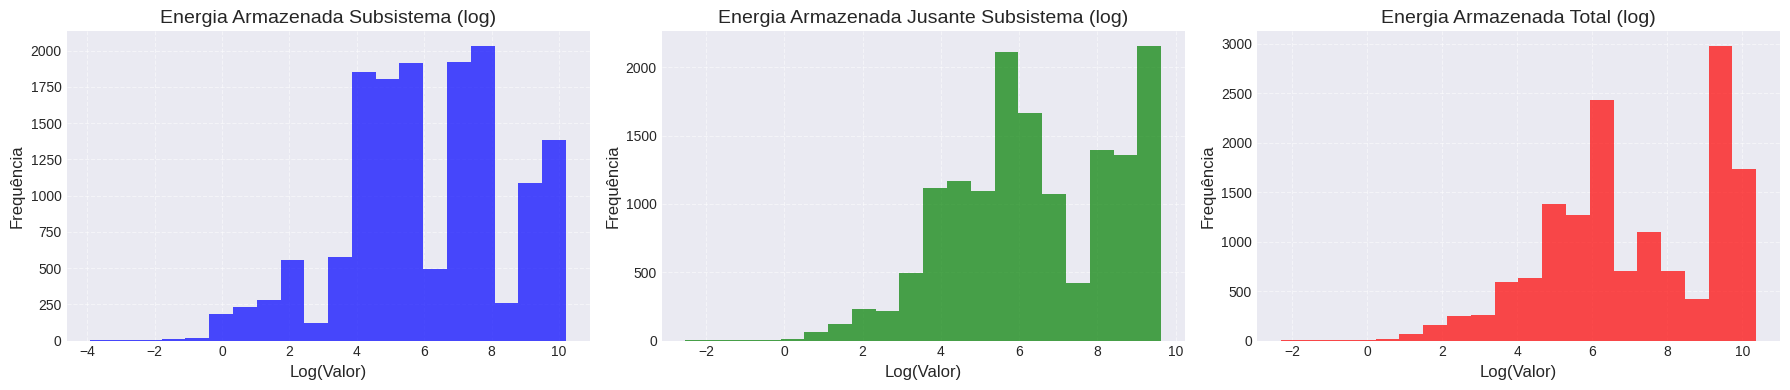

In [ ]:
# Aplicando filtro para excluir valores zero
subset_df_filtered = subset_df[(subset_df > 0).all(1)]

# Aplicando a transformação logarítmica
subset_df_log = np.log(subset_df_filtered)

# Configurações estéticas
plt.style.use('seaborn-darkgrid')
colors = ['blue', 'green', 'red', 'orange', 'purple']
titles = ['Energia Armazenada Subsistema (log)', 'Energia Armazenada Jusante Subsistema (log)',
          'Energia Armazenada Total (log)']

# Plotando histogramas para cada variável transformada
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for i, (col, ax, title, color) in enumerate(zip(subset_df_log.columns, axes.flatten(), titles, colors)):
    ax.hist(subset_df_log[col], bins=20, color=color, alpha=0.7)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Log(Valor)', fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()



In [ ]:
df['energia_armazenada_total'].sum()

462494651.05102354

Estatísticas de Resumo para energia_armazenada_subsistema:

Baixa:
               ano       mes  energia_armazenada_subsistema  \
count     126205.0  126205.0                  126205.000000   
mean   2011.955136  6.328616                     184.975253   
std       6.411756  3.555061                     246.335171   
min         2004.0       1.0                       0.000000   
25%         2005.0       3.0                       0.000000   
50%         2012.0       6.0                      60.000000   
75%         2019.0      10.0                     297.000000   
max         2024.0      12.0                     999.849000   

       energia_armazenada_jusante_subsistema  energia_armazenada_total  \
count                          126205.000000             126205.000000   
mean                               25.831208                210.806461   
std                               265.772988                380.278988   
min                                 0.000000                  0.00000

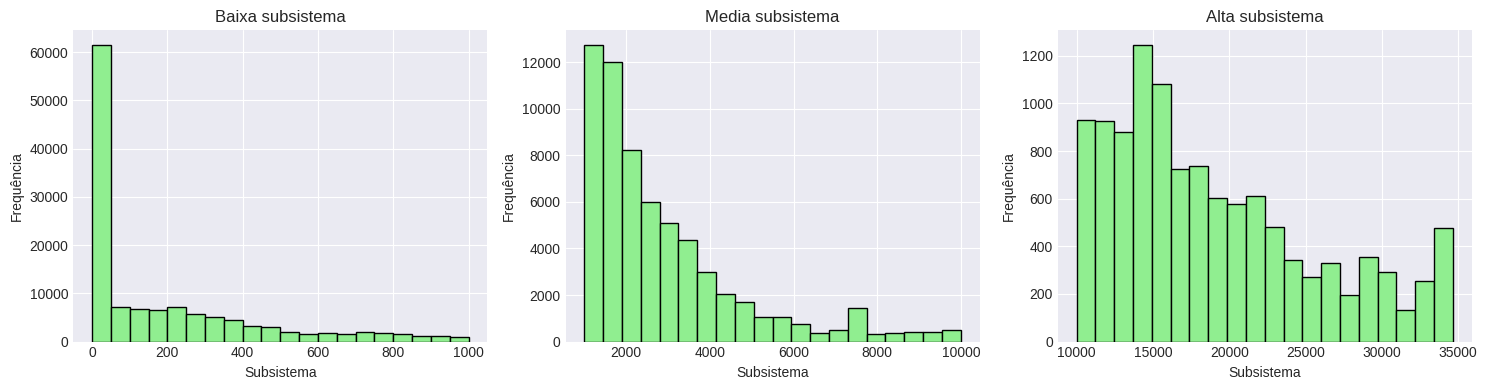

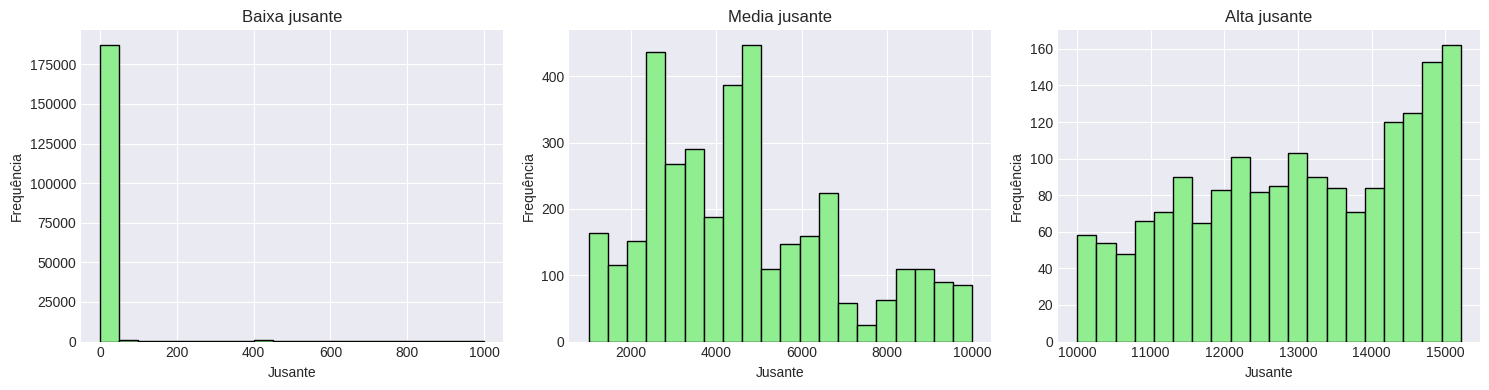

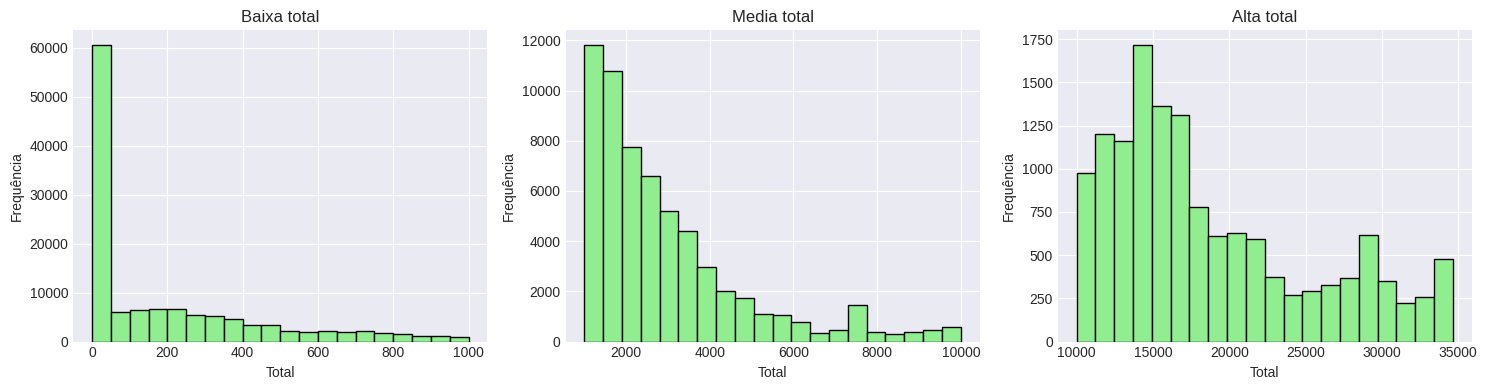

In [ ]:
# Definindo os subgrupos para cada variável
subgrupos = {
    'energia_armazenada_subsistema': {
        'baixa': df[df['energia_armazenada_subsistema'] < 1000],
        'media': df[(df['energia_armazenada_subsistema'] >= 1000) & (df['energia_armazenada_subsistema'] < 10000)],
        'alta': df[df['energia_armazenada_subsistema'] >= 10000]
    },
    'energia_armazenada_jusante_subsistema': {
        'baixa': df[df['energia_armazenada_jusante_subsistema'] < 1000],
        'media': df[(df['energia_armazenada_jusante_subsistema'] >= 1000) & (df['energia_armazenada_jusante_subsistema'] < 10000)],
        'alta': df[df['energia_armazenada_jusante_subsistema'] >= 10000]
    },
    'energia_armazenada_total': {
        'baixa': df[df['energia_armazenada_total'] < 1000],
        'media': df[(df['energia_armazenada_total'] >= 1000) & (df['energia_armazenada_total'] < 10000)],
        'alta': df[df['energia_armazenada_total'] >= 10000]
    }
}

# Calculando estatísticas de resumo para cada subgrupo
estatisticas_resumo = {}

for variavel, subgrupo in subgrupos.items():
    estatisticas_resumo[variavel] = {}
    for nome_subgrupo, df_subgrupo in subgrupo.items():
        estatisticas_resumo[variavel][nome_subgrupo] = df_subgrupo.describe()

# Imprimindo as estatísticas de resumo
for variavel, subgrupo in estatisticas_resumo.items():
    print(f"Estatísticas de Resumo para {variavel}:")
    for nome_subgrupo, estatisticas in subgrupo.items():
        print(f"\n{nome_subgrupo.capitalize()}:")
        print(estatisticas)


# Plotando histogramas para cada subgrupo de cada variável
for variavel, subgrupo in subgrupos.items():
    plt.figure(figsize=(15, 4))
    for i, (nome_subgrupo, df_subgrupo) in enumerate(subgrupo.items(), start=1):
        plt.subplot(1, 3, i)
        plt.hist(df_subgrupo[variavel], bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'{nome_subgrupo.capitalize()} {variavel.split("_")[2]}')
        plt.xlabel(f'{variavel.split("_")[2].capitalize()}')
        plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


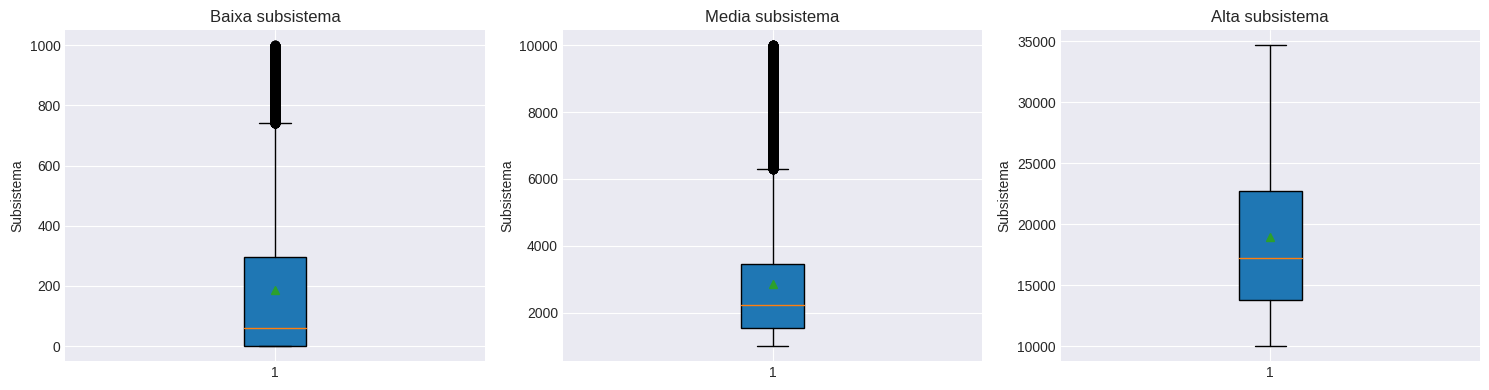

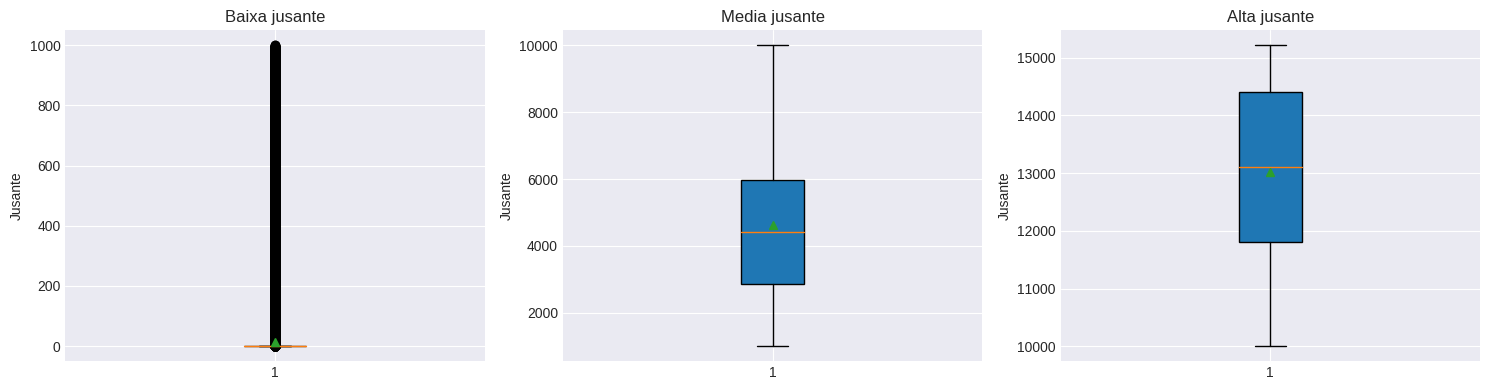

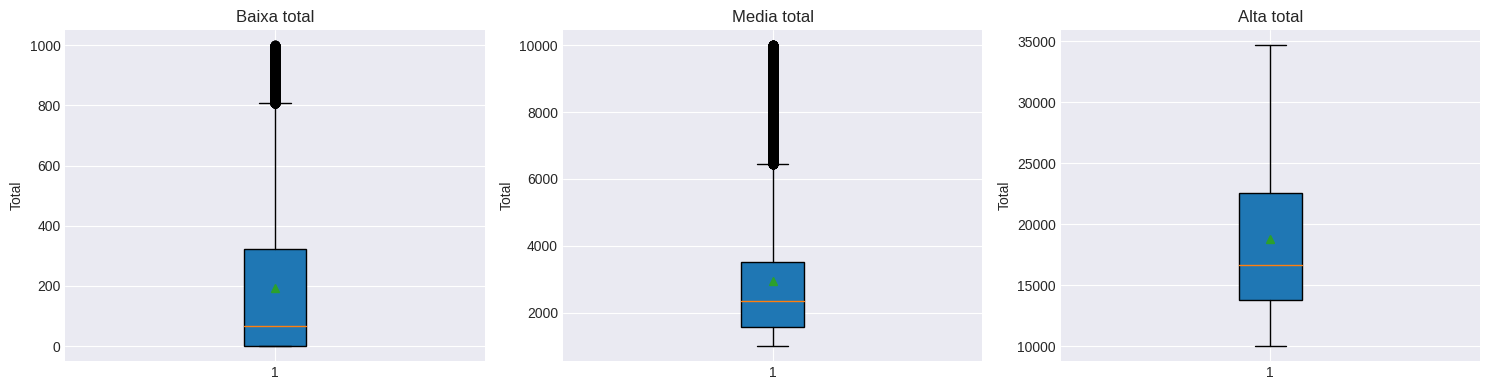

In [ ]:
# Plotando boxplots para cada subgrupo de cada variável
for variavel, subgrupo in subgrupos.items():
    plt.figure(figsize=(15, 4))
    for i, (nome_subgrupo, df_subgrupo) in enumerate(subgrupo.items(), start=1):
        plt.subplot(1, 3, i)
        plt.boxplot(df_subgrupo[variavel], patch_artist=True, showmeans=True)
        plt.title(f'{nome_subgrupo.capitalize()} {variavel.split("_")[2]}')
        plt.ylabel(f'{variavel.split("_")[2].capitalize()}')
    plt.tight_layout()
    plt.show()


<ipython-input-35-91540d06335d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subsistema', y='energia_armazenada_total', data=df, palette='viridis')


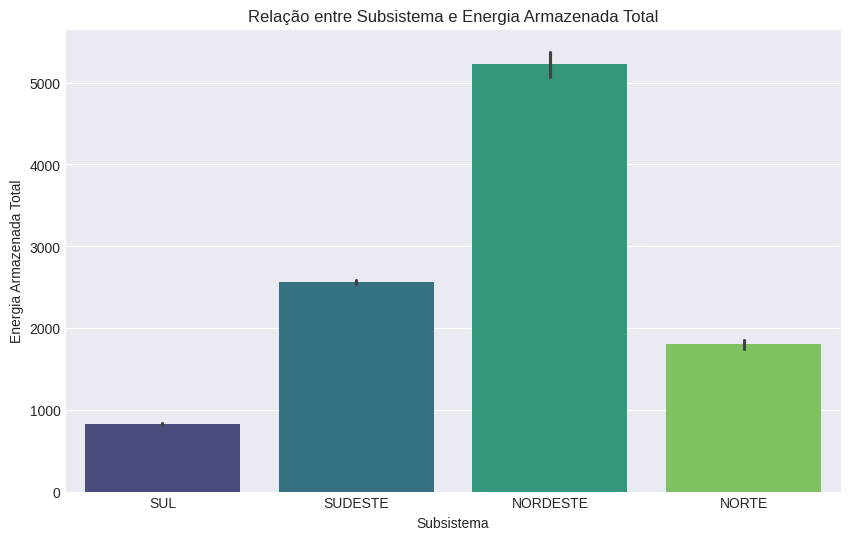

In [ ]:
# Plotando um gráfico de barras para a relação entre as variáveis 'subsistema' e 'energia_armazenada_total'
plt.figure(figsize=(10, 6))
sns.barplot(x='subsistema', y='energia_armazenada_total', data=df, palette='viridis')
plt.title('Relação entre Subsistema e Energia Armazenada Total')
plt.xlabel('Subsistema')
plt.ylabel('Energia Armazenada Total')
plt.show()


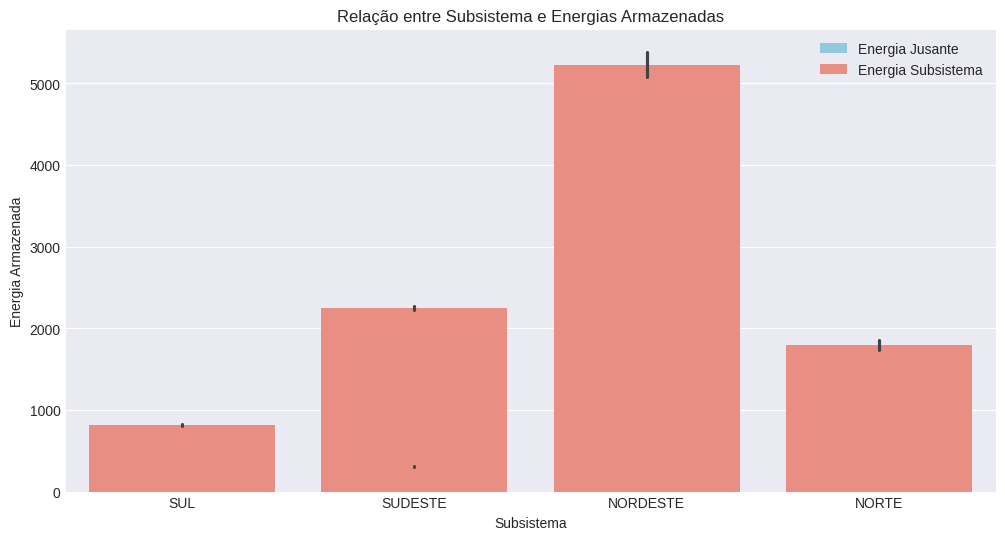

In [ ]:
# Plotando um gráfico de barras agrupado para a relação entre 'subsistema' e ambas as variáveis 'energia_armazenada_jusante_subsistema' e 'energia_armazenada_subsistema'
plt.figure(figsize=(12, 6))
sns.barplot(x='subsistema', y='energia_armazenada_jusante_subsistema', data=df, color='skyblue', label='Energia Jusante')
sns.barplot(x='subsistema', y='energia_armazenada_subsistema', data=df, color='salmon', label='Energia Subsistema')
plt.title('Relação entre Subsistema e Energias Armazenadas')
plt.xlabel('Subsistema')
plt.ylabel('Energia Armazenada')
plt.legend()
plt.show()

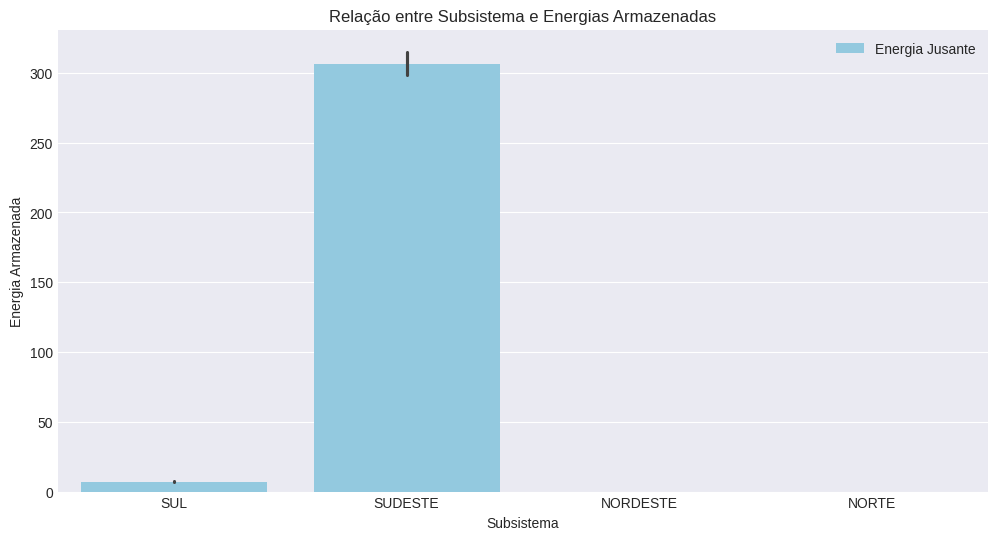

In [ ]:
# Plotando um gráfico de barras agrupado para a relação entre 'subsistema' e ambas as variáveis 'energia_armazenada_jusante_subsistema' e 'energia_armazenada_subsistema'
plt.figure(figsize=(12, 6))
sns.barplot(x='subsistema', y='energia_armazenada_jusante_subsistema', data=df, color='skyblue', label='Energia Jusante')
plt.title('Relação entre Subsistema e Energias Armazenadas')
plt.xlabel('Subsistema')
plt.ylabel('Energia Armazenada')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

# Variáveis explicativas
X_array = df[['energia_armazenada_jusante_subsistema','energia_armazenada_subsistema', 'proporcao_contribuicao_energia_armazenada_sin', 'proporcao_contribuicao_energia_armazenada_bacia']].values

# Variável de resposta
y_array = df['energia_armazenada_total'].values

# Criando o modelo de regressão linear
modelo = sm.OLS(y_array, sm.add_constant(X_array))

# Ajustando o modelo aos dados
resultado = modelo.fit()

# Imprimindo o resumo estatístico do modelo
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.516e+30
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:43:51   Log-Likelihood:             4.0369e+06
No. Observations:              200000   AIC:                        -8.074e+06
Df Residuals:                  199995   BIC:                        -8.074e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.171e-12   1.18e-12      2.680      0.0

In [ ]:
# Obtendo as previsões do modelo
predicoes = resultado.predict(X)

# Plotando valores observados vs. previsões
plt.figure(figsize=(10, 6))
plt.scatter(y, predicoes, color='blue')
plt.plot(y, y, color='red', linestyle='--')  # Linha de referência para valores observados = previsões
plt.title('Valores Observados vs. Previsões')
plt.xlabel('Valores Observados')
plt.ylabel('Previsões')
plt.grid(True)
plt.show()


NameError: name 'X' is not defined

In [ ]:
from scipy import stats

# Definindo os parâmetros
media = {
    'energia_armazenada_subsistema': 2098.407150,
    'energia_armazenada_jusante_subsistema': 214.066105,
    'energia_armazenada_total': 2312.473255
}

desvio_padrao = {
    'energia_armazenada_subsistema': 4740.981955,
    'energia_armazenada_jusante_subsistema': 1405.497561,
    'energia_armazenada_total': 5085.243902
}

tamanho_amostra = 200000
nivel_confianca = 0.95

# Calculando os intervalos de confiança para a média
conf_intervais_media = {}
for variavel in media:
    z_score = stats.norm.ppf(1 - (1 - nivel_confianca) / 2)  # Obtendo o valor crítico Z para o nível de confiança
    erro_padrao = desvio_padrao[variavel] / (tamanho_amostra ** 0.5)  # Calculando o erro padrão
    margem_erro = z_score * erro_padrao  # Calculando a margem de erro
    conf_intervais_media[variavel] = (media[variavel] - margem_erro, media[variavel] + margem_erro)

# Realizando testes de hipóteses para a média (hipótese nula: média = 0)
testes_hipoteses_media = {}
for variavel in media:
    z_score = (media[variavel] - 0) / (desvio_padrao[variavel] / (tamanho_amostra ** 0.5))  # Calculando o valor de Z
    p_valor = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Calculando o p-valor (dois lados)
    testes_hipoteses_media[variavel] = p_valor

# Exibindo os resultados
print("Intervalos de Confiança para a Média:")
for variavel, intervalo in conf_intervais_media.items():
    print(f"{variavel}: {intervalo}")

print("\nTestes de Hipóteses para a Média (H0: média = 0):")
for variavel, p_valor in testes_hipoteses_media.items():
    print(f"{variavel}: p-valor = {p_valor}")


Intervalos de Confiança para a Média:
energia_armazenada_subsistema: (2077.6292622598785, 2119.1850377401215)
energia_armazenada_jusante_subsistema: (207.90635353529046, 220.22585646470952)
energia_armazenada_total: (2290.1866004778367, 2334.759909522163)

Testes de Hipóteses para a Média (H0: média = 0):
energia_armazenada_subsistema: p-valor = 0.0
energia_armazenada_jusante_subsistema: p-valor = 0.0
energia_armazenada_total: p-valor = 0.0
